In [1]:
import tensorflow as tf
from tqdm import tqdm_notebook

In [2]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

(40000, 32, 32, 3) (40000, 1)


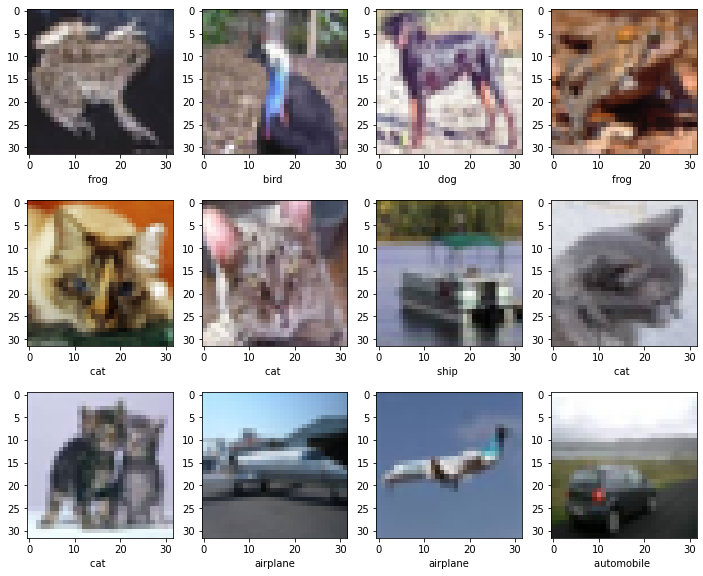

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

In [4]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [5]:
assert np.shape(X_train) == (40000, 32, 32, 3), "data shape should not change"
assert 0.9 <= max(map(np.max, (X_train, X_val, X_test))) <= 1.05
assert 0.0 <= min(map(np.min, (X_train, X_val, X_test))) <= 0.1
assert len(np.unique(X_test / 255.)) > 10, "make sure you casted data to float type"

In [6]:
import keras
from keras import layers as L
from keras import backend as K

In [7]:
model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),]
)

In [8]:
dummy_pred = model.predict(X_train[:20])
assert dummy_pred.shape == (20, 10)
assert np.allclose(dummy_pred.sum(-1), 1)
print("Успех!")

Успех!



# Обучение сети
Задание 1.1 (обязательно) Будем минимизировать многоклассовую кроссэкнропию с помощью sgd. Вам нужно получить сеть, которая достигнет не менее 45% accuracy на тестовых данных.

In [9]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

In [11]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))
tensorboard_cbk = keras.callbacks.TensorBoard(log_dir='sample/', histogram_freq=1, write_graph=True, write_images=True)
y_train_labels = tf.keras.utils.to_categorical(y_train)
model.fit(X_train, 
          y_train_labels,
          batch_size=32 , 
          epochs=30,
          callbacks=[tensorboard_cbk],
          validation_split=0.2) 
from sklearn.metrics import accuracy_score
print ("test accuracy: ", accuracy_score(y_test, np.argmax(model.predict(X_test),axis=1)))

Epoch 1/30
1000/1000 [==============================] - 9s 7ms/step - loss: 1.9201 - accuracy: 0.3101 - val_loss: 1.7967 - val_accuracy: 0.3591
Epoch 2/30
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7509 - accuracy: 0.3851 - val_loss: 1.7079 - val_accuracy: 0.4017
Epoch 3/30
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6800 - accuracy: 0.4092 - val_loss: 1.6629 - val_accuracy: 0.4265
Epoch 4/30
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6239 - accuracy: 0.4319 - val_loss: 1.6268 - val_accuracy: 0.4211
Epoch 5/30
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5849 - accuracy: 0.4451 - val_loss: 1.6157 - val_accuracy: 0.4290
Epoch 6/30
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5504 - accuracy: 0.4588 - val_loss: 1.5941 - val_accuracy: 0.4335
Epoch 7/30
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5201 - accuracy: 0.4687 - val_loss: 1.5981 - val_accuracy:

In [12]:
keras.callbacks.History


keras.callbacks.History

In [13]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, np.argmax(model.predict(X_test),axis=1))
print("\n Test_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.4897
 Not bad!


# Карманная сверточная сеть
Задание 1.2 (обязательно) Реализуйте небольшую свёрточную сеть. Совсем небольшую:

In [14]:
model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=X_train.shape[1:]),
    keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),]
)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
y_train_labels = tf.keras.utils.to_categorical(y_train)
model.fit(X_train, 
          y_train_labels,
          batch_size=32, 
          epochs=20,
          validation_split=0.2) 
print('Test Accuracy: ', accuracy_score(y_test, np.argmax(model.predict(X_test),axis=1)))

Epoch 1/20
1000/1000 [==============================] - 12s 12ms/step - loss: 1.6383 - accuracy: 0.4139 - val_loss: 1.4337 - val_accuracy: 0.4880
Epoch 2/20
1000/1000 [==============================] - 10s 10ms/step - loss: 1.3367 - accuracy: 0.5251 - val_loss: 1.3499 - val_accuracy: 0.5179
Epoch 3/20
1000/1000 [==============================] - 11s 11ms/step - loss: 1.2156 - accuracy: 0.5729 - val_loss: 1.2578 - val_accuracy: 0.5587
Epoch 4/20
1000/1000 [==============================] - 11s 11ms/step - loss: 1.1290 - accuracy: 0.6012 - val_loss: 1.2050 - val_accuracy: 0.5734
Epoch 5/20
1000/1000 [==============================] - 11s 11ms/step - loss: 1.0573 - accuracy: 0.6274 - val_loss: 1.1779 - val_accuracy: 0.5846
Epoch 6/20
1000/1000 [==============================] - 12s 12ms/step - loss: 1.0000 - accuracy: 0.6478 - val_loss: 1.1874 - val_accuracy: 0.5867
Epoch 7/20
1000/1000 [==============================] - 12s 12ms/step - loss: 0.9450 - accuracy: 0.6660 - val_loss: 1.1751 -

In [15]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, np.argmax(model.predict(X_test),axis=1))
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.589
 Not bad!
